In [8]:
#Gurkaranjit Asahan, Keron Tifso
#Machine Learning Project


#importing libraries/packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
#importing the dataset we found on kaggle

df = pd.read_csv('/content/parkinsons_disease_data.csv')


#dropping the identifiers and target separation
X = df.drop(columns=['PatientID', 'Diagnosis', 'DoctorInCharge'])
y = df['Diagnosis']

#training split for the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
#training the MLP model

mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=15, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6244 - loss: 0.6553 - val_accuracy: 0.7577 - val_loss: 0.5222
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7469 - loss: 0.5128 - val_accuracy: 0.7767 - val_loss: 0.4480
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7931 - loss: 0.4463 - val_accuracy: 0.7815 - val_loss: 0.4263
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8299 - loss: 0.3748 - val_accuracy: 0.7886 - val_loss: 0.4215
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8287 - loss: 0.3622 - val_accuracy: 0.7981 - val_loss: 0.4271
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8453 - loss: 0.3790 - val_accuracy: 0.7838 - val_loss: 0.4197
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8427 - loss: 0.3457 - val_accuracy: 0.7838 - val_loss: 0.4264
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8545 - loss: 0.3411 - val_accuracy: 0.7862 - val_

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       150
           1       0.85      0.83      0.84       271

    accuracy                           0.80       421
   macro avg       0.78      0.79      0.78       421
weighted avg       0.80      0.80      0.80       421



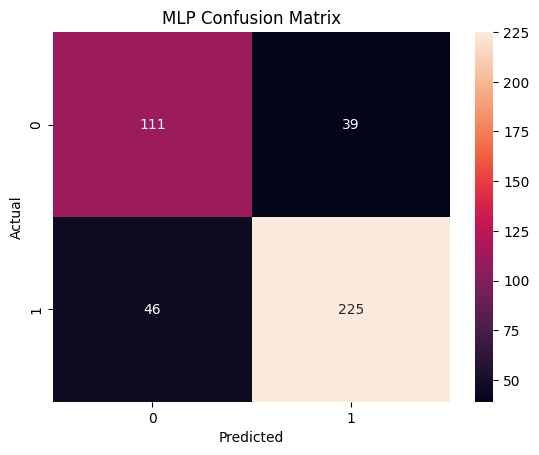

In [6]:
#summary report
#including a heatmap

mlp_preds = (mlp.predict(X_test_scaled) > 0.5).astype("int32")
print(classification_report(y_test, mlp_preds))

cm = confusion_matrix(y_test, mlp_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       150
           1       0.82      0.86      0.84       271

    accuracy                           0.78       421
   macro avg       0.77      0.75      0.76       421
weighted avg       0.78      0.78      0.78       421



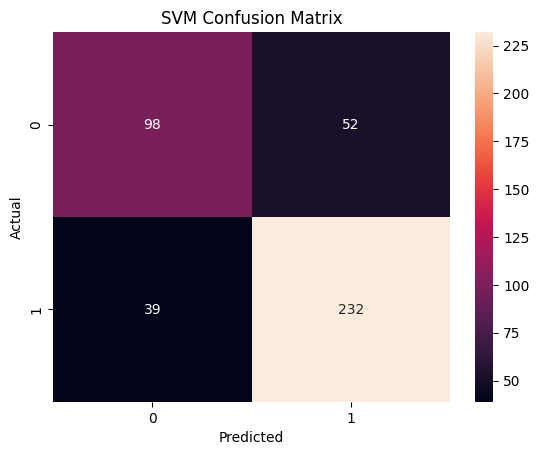

In [7]:
#training SVM model

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)

#printing summary
#creating heatmap

print(classification_report(y_test, svm_preds))
cm_svm = confusion_matrix(y_test, svm_preds)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
